In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.

In [50]:
!pip install category_encoders

In [2]:
!pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.5
    Uninstalling MarkupSafe-2.1.5:
      Successfully uninstalled MarkupSafe-2.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == 

In [3]:
!pip install jinja2

In [4]:
#Import libraries
import jinja2
from pycaret.regression import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
#Load the data
# from google.colab import files
# files.upload()
import yfinance as yf
start = '2014-01-24'
end = '2024-03-16'
stock = 'SBIN.NS'

asset = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [35]:
#show the data
asset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-24,164.899994,166.490005,161.800003,162.119995,147.695206,16616560
2014-01-27,159.789993,160.399994,158.304993,159.449997,145.262756,15688040
2014-01-28,160.304993,162.800003,157.824997,159.630005,145.426758,18296910
2014-01-29,161.300003,162.179993,157.000000,157.365005,143.363312,17594550
2014-01-30,155.500000,155.800003,151.005005,151.660004,138.165878,20955320
...,...,...,...,...,...,...
2024-03-11,790.000000,792.799988,770.549988,773.700012,773.700012,16778340
2024-03-12,770.000000,777.750000,757.349976,759.700012,759.700012,21529705
2024-03-13,758.650024,763.700012,743.000000,747.250000,747.250000,27950252


In [39]:
# print(asset.index)     //     very important
asset.reset_index(inplace=True)

In [43]:
#Set the date as the index
asset = asset.set_index(pd.DatetimeIndex(asset['Date'].values))
#show the data
asset

,Date,Open,High,Low,Close,Adj Close,Volume
2014-01-24,2014-01-24,164.899994,166.490005,161.800003,162.119995,147.695206,16616560
2014-01-27,2014-01-27,159.789993,160.399994,158.304993,159.449997,145.262756,15688040
2014-01-28,2014-01-28,160.304993,162.800003,157.824997,159.630005,145.426758,18296910
2014-01-29,2014-01-29,161.300003,162.179993,157.000000,157.365005,143.363312,17594550
2014-01-30,2014-01-30,155.500000,155.800003,151.005005,151.660004,138.165878,20955320
...,...,...,...,...,...,...,...
2024-03-11,2024-03-11,790.000000,792.799988,770.549988,773.700012,773.700012,16778340
2024-03-12,2024-03-12,770.000000,777.750000,757.349976,759.700012,759.700012,21529705
2024-03-13,2024-03-13,758.650024,763.700012,743.000000,747.250000,747.250000,27950252
2024-03-14,2024-03-14,749.900024,750.799988,734.049988,741.049988,741.049988,19730882


In [44]:
#Make a copy of the data set
df3 = asset.copy()
#Store the data in a feature data set call 'X' and in the target column
X = np.array(df3[['Date','Open','Close']])
#Store the close pricee as an array in a variable called 'y'
y = df3['Close'].values
#Split the data into 85% training and 15% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0 , shuffle= False)

In [45]:
#Get the train data and transform it to a a dataframe
train_data = pd.DataFrame(x_train, columns = ['Date','Open','Close'])
#show the first 7 row of data
train_data.head(7)

,Date,Open,Close
0,2014-01-24,164.899994,162.119995
1,2014-01-27,159.789993,159.449997
2,2014-01-28,160.304993,159.630005
3,2014-01-29,161.300003,157.365005
4,2014-01-30,155.5,151.660004
5,2014-01-31,153.050003,152.384995
6,2014-02-03,152.5,148.835007


In [57]:
#Get the test data and transform it to a a dataframe
test_data = pd.DataFrame(x_test, columns = ['Date','Open','Close'])
#show the first 7 row of data
test_data.head(7)

,Date,Open,Close
0,2022-09-09,549.650024,553.349976
1,2022-09-12,554.900024,554.900024
2,2022-09-13,560.0,558.0
3,2022-09-14,550.0,571.75
4,2022-09-15,572.549988,572.150024
5,2022-09-16,569.099976,561.799988
6,2022-09-19,560.700012,572.25


In [53]:
from category_encoders import TargetEncoder
target_encoder = TargetEncoder()
train_data['Close'] = target_encoder.fit_transform(train_data['Close'], train_data['Close'])

In [54]:
#Initialize the setup
s = setup(data=train_data,target='Close',session_id = 123,use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(2125, 3)"
4,Transformed data shape,"(2125, 5)"
5,Transformed train set shape,"(1487, 5)"
6,Transformed test set shape,"(638, 5)"
7,Date features,1
8,Categorical features,1
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

/usr/local/lib/python3.10/dist-packages/pycaret/internal/metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [55]:
#Train on multiple  models and compare them
compare_models(sort='MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,0.6253,0.7216,0.8471,0.9946,0.0028,0.0021,0.0550
omp,Orthogonal Matching Pursuit,0.6257,0.7216,0.8471,0.9946,0.0028,0.0021,0.0540
lasso,Lasso Regression,0.6250,0.7217,0.8472,0.9946,0.0028,0.0021,0.0560
llar,Lasso Least Angle Regression,0.6250,0.7217,0.8472,0.9946,0.0028,0.0021,0.0540
br,Bayesian Ridge,0.6273,0.7242,0.8486,0.9946,0.0028,0.0021,0.0560
lr,Linear Regression,0.6274,0.7243,0.8487,0.9946,0.0028,0.0021,0.0580
ridge,Ridge Regression,0.6274,0.7243,0.8487,0.9946,0.0028,0.0021,0.0540
lar,Least Angle Regression,0.6274,0.7243,0.8487,0.9946,0.0028,0.0021,0.0540
huber,Huber Regressor,0.6585,0.7722,0.8764,0.9943,0.0029,0.0022,0.1030
gbr,Gradient Boosting Regressor,0.6569,0.8052,0.8941,0.9940,0.0030,0.0022,0.2280


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ElasticNet(random_state=123)

In [56]:
 #Create the model
 en = create_model('en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5863,0.7185,0.8476,0.9943,0.0028,0.0020
1,0.6150,0.6803,0.8248,0.9944,0.0027,0.0021
2,0.6308,0.7147,0.8454,0.9941,0.0029,0.0021
3,0.6875,0.7875,0.8874,0.9948,0.0029,0.0023
4,0.6958,0.9257,0.9621,0.9939,0.0032,0.0023
5,0.5942,0.5732,0.7571,0.9959,0.0025,0.0020
6,0.6117,0.8075,0.8986,0.9939,0.0030,0.0021
7,0.5478,0.5480,0.7403,0.9962,0.0025,0.0018
8,0.6685,0.7906,0.8892,0.9929,0.0030,0.0023


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [59]:
#Get the predictions
predict_model(en,data= test_data.drop(['Close'], axis=1))

,Date,Open,prediction_label
0,2022-09-09,549.650024,329.756396
1,2022-09-12,554.900024,330.445975
2,2022-09-13,560.000000,331.115849
3,2022-09-14,550.000000,329.802365
4,2022-09-15,572.549988,332.764271
...,...,...,...
370,2024-03-11,790.000000,361.325992
371,2024-03-12,770.000000,358.699023
372,2024-03-13,758.650024,357.208222
373,2024-03-14,749.900024,356.058923


In [60]:
#Show the actual values
test_data['Close']

0      553.349976
1      554.900024
2           558.0
3          571.75
4      572.150024
          ...    
370    773.700012
371    759.700012
372        747.25
373    741.049988
374    731.900024
Name: Close, Length: 375, dtype: object

Compare Models

In [62]:

# functional API
best = compare_models()

# OOP API
best = s.compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.6274,0.7243,0.8487,0.9946,0.0028,0.0021,0.0570
lasso,Lasso Regression,0.6250,0.7217,0.8472,0.9946,0.0028,0.0021,0.0570
ridge,Ridge Regression,0.6274,0.7243,0.8487,0.9946,0.0028,0.0021,0.0700
en,Elastic Net,0.6253,0.7216,0.8471,0.9946,0.0028,0.0021,0.0770
lar,Least Angle Regression,0.6274,0.7243,0.8487,0.9946,0.0028,0.0021,0.0700
llar,Lasso Least Angle Regression,0.6250,0.7217,0.8472,0.9946,0.0028,0.0021,0.0560
omp,Orthogonal Matching Pursuit,0.6257,0.7216,0.8471,0.9946,0.0028,0.0021,0.0550
br,Bayesian Ridge,0.6273,0.7242,0.8486,0.9946,0.0028,0.0021,0.0560
huber,Huber Regressor,0.6585,0.7722,0.8764,0.9943,0.0029,0.0022,0.0800
gbr,Gradient Boosting Regressor,0.6569,0.8052,0.8941,0.9940,0.0030,0.0022,0.2280


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.6274,0.7243,0.8487,0.9946,0.0028,0.0021,0.0590
lasso,Lasso Regression,0.6250,0.7217,0.8472,0.9946,0.0028,0.0021,0.0570
ridge,Ridge Regression,0.6274,0.7243,0.8487,0.9946,0.0028,0.0021,0.0560
en,Elastic Net,0.6253,0.7216,0.8471,0.9946,0.0028,0.0021,0.0550
lar,Least Angle Regression,0.6274,0.7243,0.8487,0.9946,0.0028,0.0021,0.0550
llar,Lasso Least Angle Regression,0.6250,0.7217,0.8472,0.9946,0.0028,0.0021,0.0550
omp,Orthogonal Matching Pursuit,0.6257,0.7216,0.8471,0.9946,0.0028,0.0021,0.0560
br,Bayesian Ridge,0.6273,0.7242,0.8486,0.9946,0.0028,0.0021,0.0550
huber,Huber Regressor,0.6585,0.7722,0.8764,0.9943,0.0029,0.0022,0.1100
gbr,Gradient Boosting Regressor,0.6569,0.8052,0.8941,0.9940,0.0030,0.0022,0.2300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [63]:
print(best)

LinearRegression(n_jobs=-1)


Analyze Model

In [64]:

# functional API
evaluate_model(best)

# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

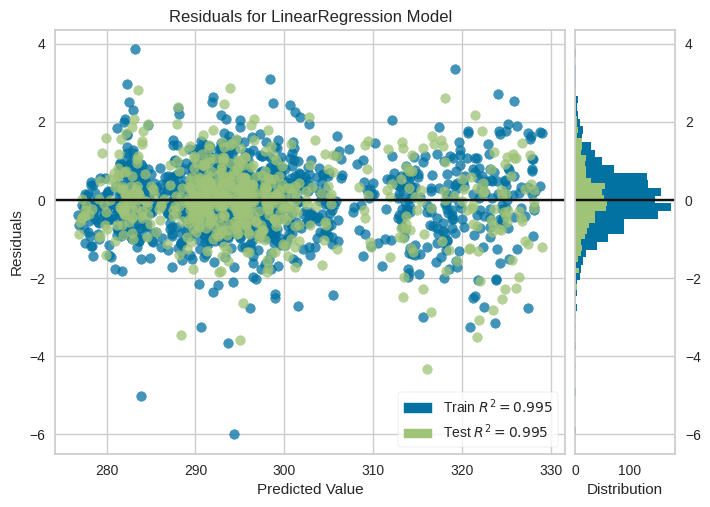

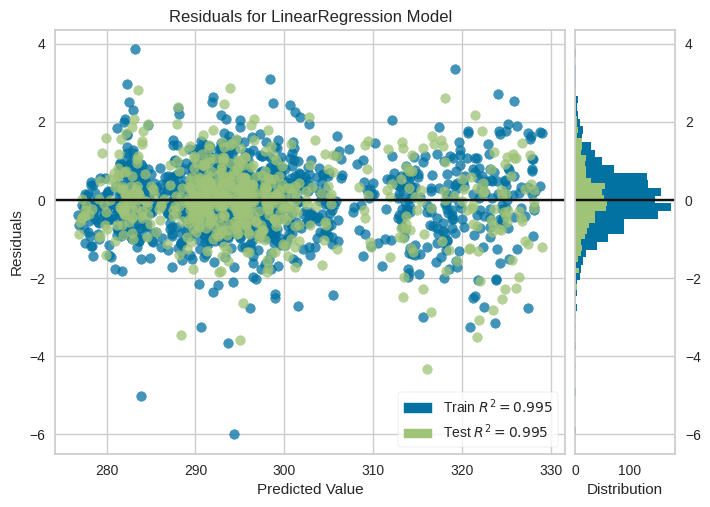

In [65]:

# functional API
plot_model(best, plot = 'residuals')

# OOP API
s.plot_model(best, plot = 'residuals')

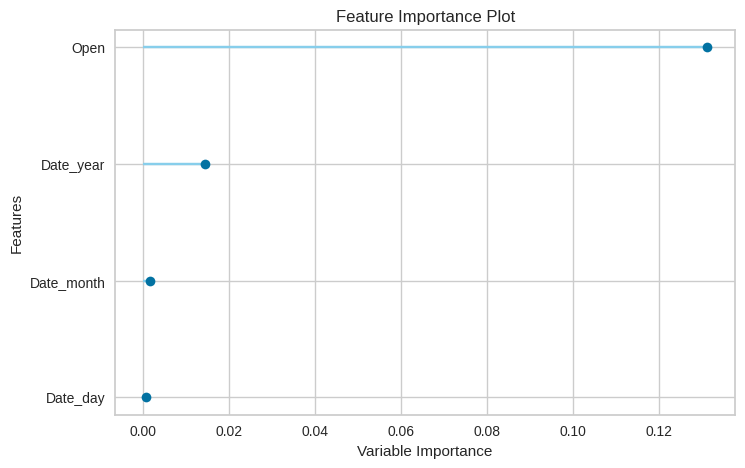

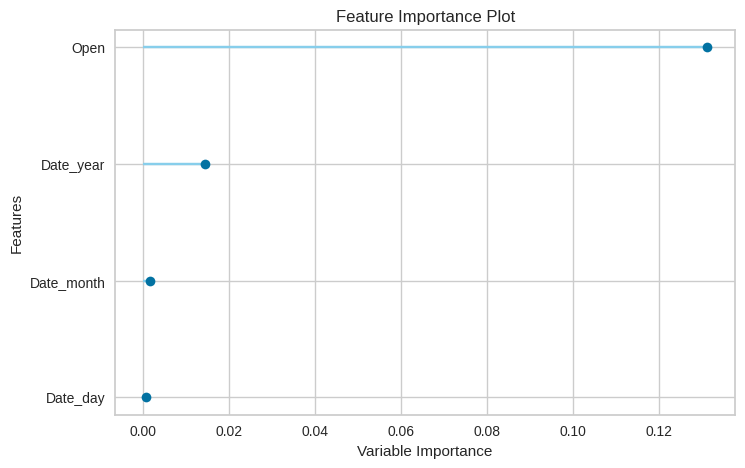

In [66]:

# functional API
plot_model(best, plot = 'feature')

# OOP API
s.plot_model(best, plot = 'feature')

Predictions

In [67]:

# functional API
predict_model(best)

# OOP API
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.6465,0.7971,0.8928,0.9948,0.0030,0.0022


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.6465,0.7971,0.8928,0.9948,0.0030,0.0022


,Date,Open,Close,prediction_label
63,2014-04-30,206.994995,285.091400,284.698503
1080,2018-06-15,282.750000,293.920258,294.703310
683,2016-11-10,267.000000,294.466400,292.619072
229,2015-01-05,316.250000,298.927612,299.052548
1387,2019-09-19,279.950012,293.703278,294.352642
...,...,...,...,...
1390,2019-09-24,313.149994,297.562958,298.704717
1937,2021-12-08,480.899994,322.001862,320.749830
1860,2021-08-16,430.000000,313.323639,314.063062
512,2016-02-26,155.500000,278.330963,277.971705


In [69]:

# functional API
predictions = predict_model(best, data=data)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,88.2849,15461.5503,124.3445,0.1649,0.3203,0.2400


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,88.2849,15461.5503,124.3445,0.1649,0.3203,0.2400


,Date,Open,High,Low,Adj Close,Volume,Close,prediction_label
0,2014-01-24,164.899994,166.490005,161.800003,147.695206,16616560,162.119995,279.175731
1,2014-01-27,159.789993,160.399994,158.304993,145.262756,15688040,159.449997,278.503841
2,2014-01-28,160.304993,162.800003,157.824997,145.426758,18296910,159.630005,278.570852
3,2014-01-29,161.300003,162.179993,157.000000,143.363312,17594550,157.365005,278.700825
4,2014-01-30,155.500000,155.800003,151.005005,138.165878,20955320,151.660004,277.939510


Save the model

In [70]:

# functional API
save_model(best, 'my_best_pipeline')

# OOP API
s.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['Date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=[], transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Open'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['Open'],
                                     transformer=TargetEncoder(cols=[],
                                                               handle_missing='return_nan'))),
                 ('trained_model', LinearRegression(n_jobs=-1))]),
 'my_best_pipeline.pkl')

To load the model back in the environment:

In [71]:

# functional API
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

# OOP API
loaded_model = s.load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['Date'],
                                    transformer=ExtractDateTimeFeatures())),
                ('numerical_imputer',
                 TransformerWrapper(include=[], transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Open'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['Open'],
                                    transformer=TargetEncoder(cols=[],
                                                              handle_missing='return_nan'))),
                ('trained_model', LinearRegression(n_jobs=-1))])
Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib)